<a href="https://colab.research.google.com/github/cagutierrezgu/My_Portfolio/blob/main/Faces%20and%20gender%20prediction/Features%20extraction/Features.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Features extraction

Ya fueron vistas algunas de las imágenes que están en el archivo comprimido, ahora se muestran otras más con sus repectivas etiquetas de edad y género, que son las que se espera predecir con redes neuronales:

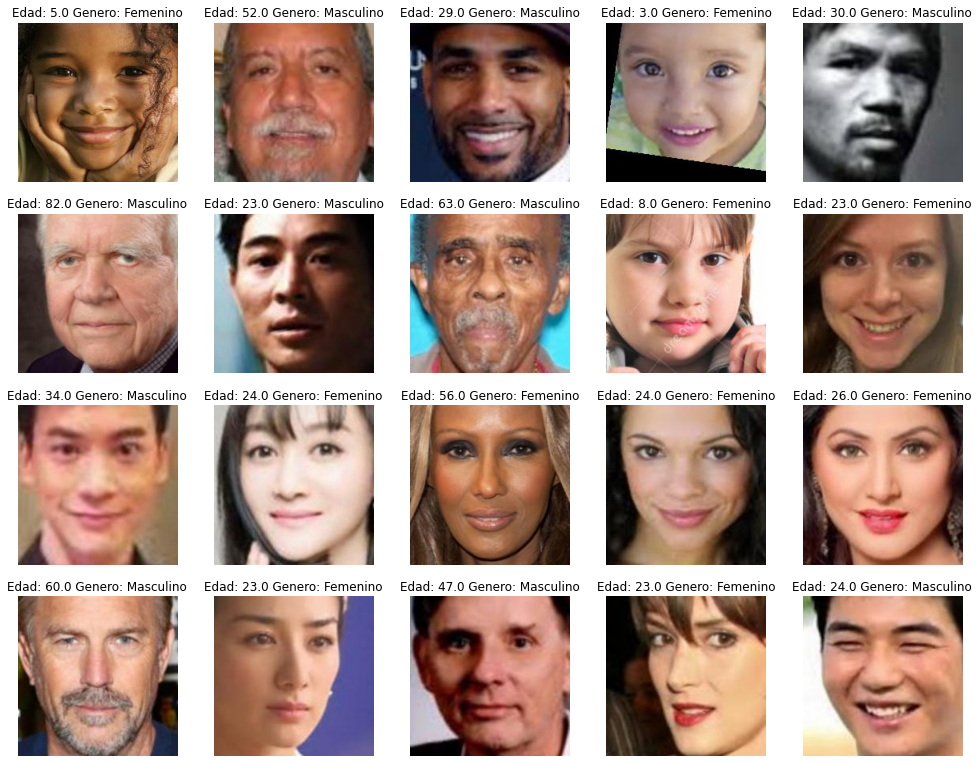

In [ ]:
example = images1.iloc[:20]
plt.figure(figsize=(17,17))
for index, file, age, gen in example.itertuples():
    plt.subplot(5,5, index+1)
    img = load_img("UTKFace/"+file)
    img = np.array(img)
    plt.imshow(img)
    plt.title(f"Edad: {age} Genero: {genero[int(gen)]}")
    plt.axis('off')

Para comprender la variedad de las imágenes con las que se dispone, resulta útil hacer un histograma de las edades para notar predominancias de ciertas edades sobre otras:

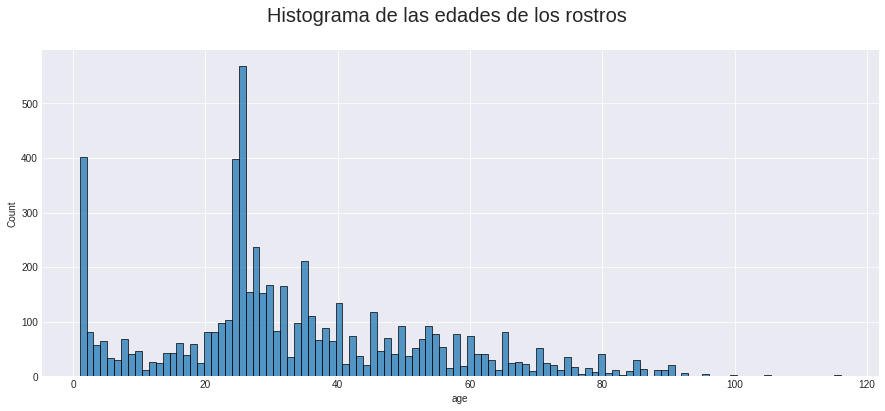

In [ ]:
plt.figure(figsize=(15,6))
plt.style.use('seaborn-darkgrid');
sns.histplot(data=images1, x='age', bins=110);
plt.suptitle('Histograma de las edades de los rostros', fontsize = 20);

Esta gráfica permite ver que hay un gran cantidad de personas entre los 20 y 40 años, así como de los primeros años de vida; sin embargo, gente de la tercera edad y en especial después de los 80 años existen muy pocos datos, así que podría haber una preferencia de los modelos por predecir edades menores a las reales para personas mayores a 40 años.

Ahora se realiza un diagrama de barras para la otra etiqueta, el género:

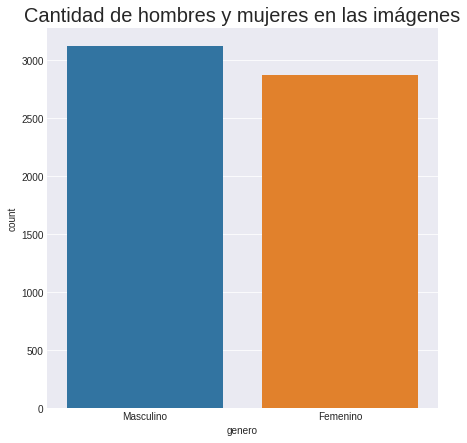

In [ ]:
fig, ax = plt.subplots(figsize=(7,7))
sns.countplot(x=images1.genero, ax=ax);
ax.set_title('Cantidad de hombres y mujeres en las imágenes', fontsize = 20);
ax.set_xticklabels(['Masculino', 'Femenino']);

A diferencia de lo visto con las edades, los géneros parecen estar mejor distribuidos y se espera una mejor predicción de los modelos para esta etiqueta.

Debido a que las etiquetas y las imágenes ya están debidamente representadas y recortadas respectivamente, no se aplicarán técnicas de representación sobre las imágenes, y estas al igual que las etiquetas ingresarán a los modelos tal como ya están, únicamente con la salvedad de un reescalamiento de las imágenes a 150x150 pixeles. Es por esto que se procede a separar las imágenes y etiquetas en conjuntos de entrenamiento y prueba:

In [ ]:
xy_train, xy_test = train_test_split(images1, test_size=0.3, random_state=60)

Lo anterior son dataframes de prueba y entrenamiento con imágenes y etiquetas, así que se separarán las imágenes de ambos conjuntos y se hará el reescalamiento mencionado:

In [ ]:
# Separación de las imágenes del conjunto de entrenamiento
x_train = []
for file in xy_train.image:
    img = load_img("UTKFace/"+file)
    img = img.resize((150,150))
    img = np.array(img)
    x_train.append(img)

x_train = np.array(x_train)
x_train = x_train.reshape(len(x_train), 150,150,3)

# Separación de las imágenes del conjunto de prueba
x_test = []
for file in xy_test.image:
    img = load_img("UTKFace/"+file)
    img = img.resize((150,150))
    img = np.array(img)
    x_test.append(img)

x_test = np.array(x_test)

x_test = x_test.reshape(len(x_test), 150,150,3)

In [ ]:
print(x_train.shape)
print(x_test.shape)

(4200, 150, 150, 3)
(1800, 150, 150, 3)


Así mismo, se reescala la intensidad de los pixeles de cada imagen, pasarán de (0, 255) a (0, 1):

In [ ]:
x_train = x_train/255
x_test = x_test/255

Al igual que se realizó la separación de las imágenes de los conjuntos de entrenamiento y prueba, se hace lo equivalente para las etiquetas a predecir:

In [ ]:
# Separación de las etiquetas del conjunto de entrenamiento
y_train_gen = np.array(xy_train.genero)
y_train_age = np.array(xy_train.age)
# Separación de las etiquetas del conjunto de prueba
y_test_gen = np.array(xy_test.genero)
y_test_age = np.array(xy_test.age)